In [2]:
# import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
%matplotlib inline

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [3]:
## import dataset

data=pd.read_csv("G:/50_Startups.csv")
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


## EDA


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
data1=data.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
data1

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [8]:
data1[data1.duplicated()] ### No duplicated data

,RDS,ADMS,MKTS,State,Profit


In [89]:
data1['State'].value_counts()
#can see that there are 3 different categories for State variable

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [137]:
data1.describe()

,RDS,ADMS,MKTS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## Correlation Analysis

In [9]:
data1.corr()

C:\Users\hp\AppData\Local\Temp\ipykernel_8820\3734675979.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data1.corr()


,RDS,ADMS,MKTS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMS,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


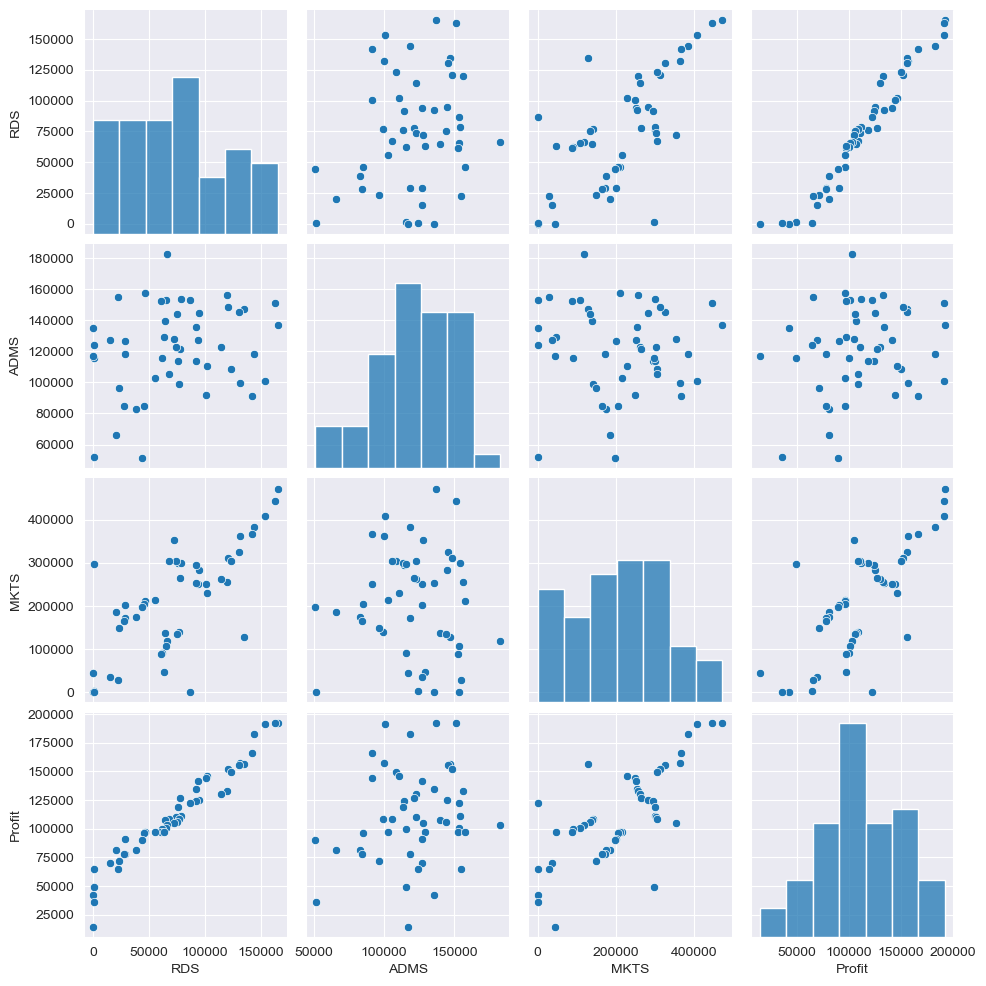

In [14]:
sns.set_style(style='darkgrid')
sns.pairplot(data1)

<Axes: xlabel='State', ylabel='Profit'>

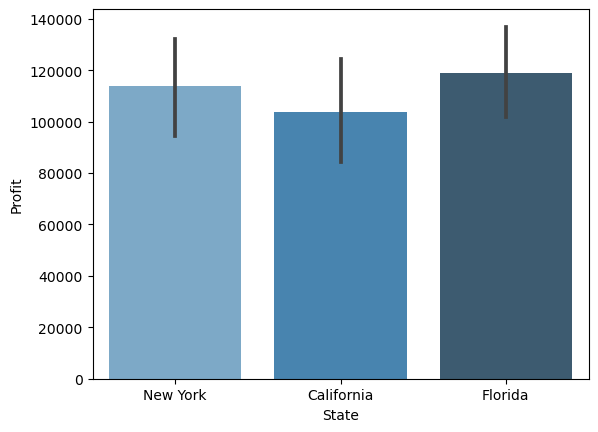

In [10]:
# profit split in State level - Looks Florida has the maximum Profit
sns.barplot(x='State',y='Profit',data=data1, palette="Blues_d")
#sns.lineplot(x='State',y='Profit',data=data1)

C:\Users\hp\AppData\Local\Temp\ipykernel_10252\1820951156.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['Profit'],bins=5,kde=True)


<Axes: xlabel='Profit', ylabel='Density'>

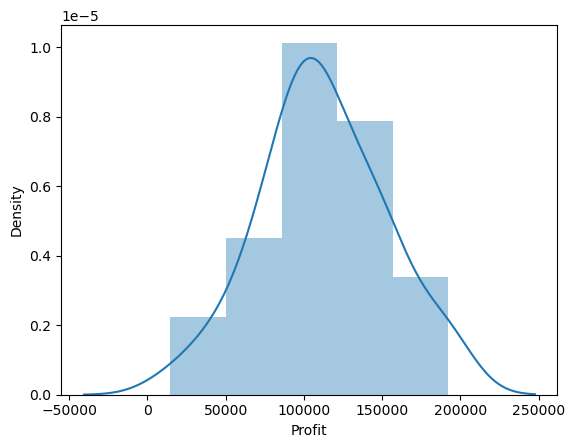

In [35]:
#Histgram on Profit
sns.distplot(data1['Profit'],bins=5,kde=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_10252\2436023326.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data1.corr(), annot=True)


<Axes: >

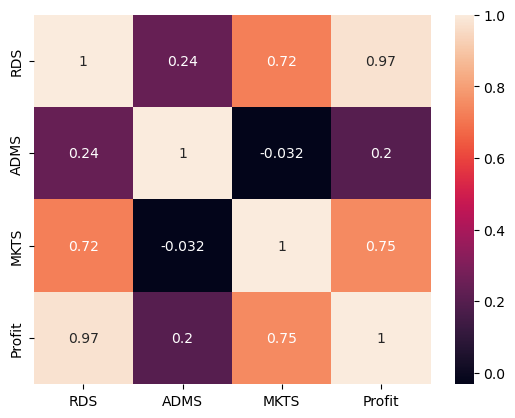

In [38]:
#gives positive & negative relation between categories
sns.heatmap(data1.corr(), annot=True)

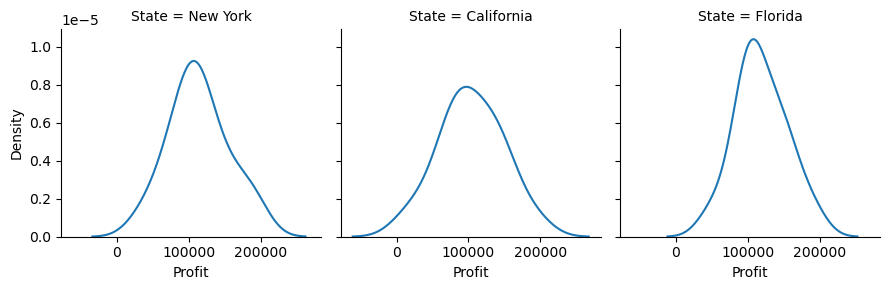

In [139]:
# spread of profit against state 
g=sns.FacetGrid(data1, col='State')
g=g.map(sns.kdeplot,'Profit')

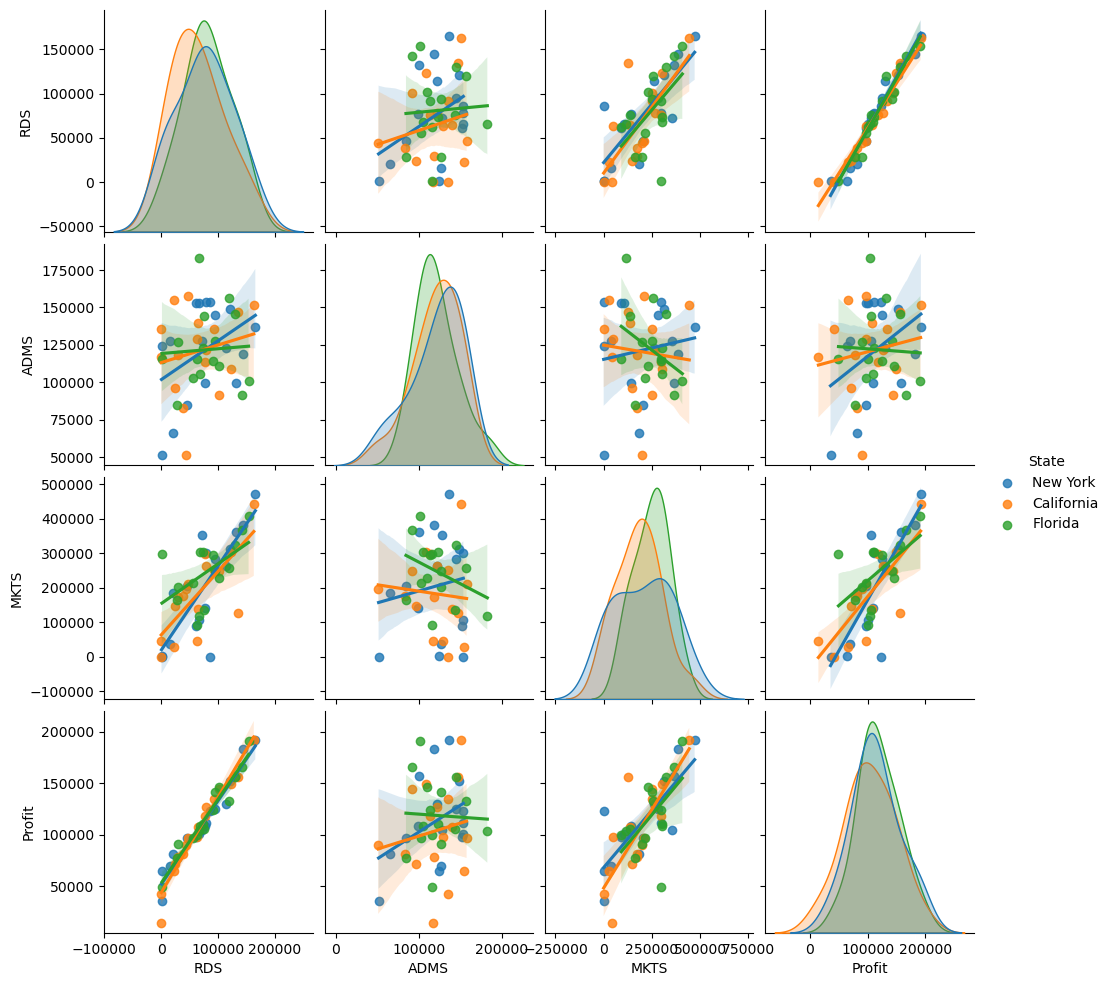

In [11]:
sns.pairplot(data1,kind='reg',hue = 'State')

There are 3 states -> Florida, California, New York\
1.All States has approx equal profit\
2.Florida is leading in profit with 35% of overall profit\
3.Since all states has equal profit, dropping the State Column from dataframe

In [13]:
#spliting Dataset in Dependent & Independent Variables
X = data1.iloc[:, :-1].values
y = data1.iloc[:, 4].values

In [14]:
from sklearn.preprocessing import LabelEncoder
#Label Encoder: Encode labels with values between 0 and n_classes-1.

labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
X1 = pd.DataFrame(X)
X1.head()

,0,1,2,3
0,165349.2,136897.8,471784.1,2
1,162597.7,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [15]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("encoder", OneHotEncoder(), [3])], remainder = 'passthrough')
X= np.array(ct.fit_transform(X),dtype=np.str)

C:\Users\hp\AppData\Local\Temp\ipykernel_9816\1299431418.py:7: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X= np.array(ct.fit_transform(X),dtype=np.str)


## Encoding categorical data



In [37]:
#X.astype(int)
#y.astype(int)

In [17]:
X = X.astype('float64')
X1 = pd.DataFrame(X)
X1.head()

,0,1,2,3,4,5
0,0.0,0.0,1.0,165349.20,136897.80,471784.10
1,1.0,0.0,0.0,162597.70,151377.59,443898.53
2,0.0,1.0,0.0,153441.51,101145.55,407934.54
3,0.0,0.0,1.0,144372.41,118671.85,383199.62
4,0.0,1.0,0.0,142107.34,91391.77,366168.42


In [18]:
X.astype('float64')
y.astype('float64')

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [19]:
# Avoiding the Dummy Variable Trap
X = X[:, 1:]

In [31]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [50]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
model=regressor.fit(X_train, y_train)

In [51]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([103015.20159796, 132582.27760815, 132447.73845175,  71976.09851258,
       178537.48221056, 116161.24230166,  67851.69209676,  98791.73374687,
       113969.43533013, 167921.06569551])

In [57]:
x = data1[['RDS', 'ADMS', 'MKTS']]
y = data1['State']

In [58]:
print("Intercept: ", model.intercept_)
print("Coefficients:")
list(zip(x, model.coef_))

Intercept:  42554.16761772438
Coefficients:


[('RDS', -959.2841600527313),
 ('ADMS', 699.3690525212787),
 ('MKTS', 0.7734671927327731)]

In [25]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [62]:
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = math.sqrt(MSE)
# R2_score = r2_score(y_test,y_pred)

print("Average absolute error value (MAE):", MAE)
print("Mean square error value (MSE):", MSE)
print("Root mean square of error (RMSE):", RMSE)
print("R2 Squared for test: ", r2_score(y_test,y_pred))
print("R2 Squared for train: ", regressor.score(X_train, y_train))

Average absolute error value (MAE): 7514.293659640891
Mean square error value (MSE): 83502864.03257468
Root mean square of error (RMSE): 9137.990152794797
R2 Squared for test:  0.9347068473282446
R2 Squared for train:  0.9501847627493607
